# Εισάγουμε τις απαραίτητες βιβλιοθήκες

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import ast
import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

## Εισάγουμε τα δεδομένα και κρατάμε τις στήλες που χρειαζόμαστε

In [ ]:
skai_df = pd.read_csv("https://raw.githubusercontent.com/stavrouk/Stavrou_Teliki_Ergasia/main/Scraping/skai_emvolio.csv")

In [ ]:
skai_df= skai_df[['title' , 'date' , 'summary' , 'body']]

In [ ]:
skai_df.head()

title  ...                                               body
0  Moderna: Τουλάχιστον έξι μήνες προστασία μετά ...  ...  \nΗ αμερικανική φαρμακευτική εταιρία Moderna α...
1  Η Pfizer θα παράγει συστατικό για το εμβόλιο κ...  ...  \nΗ Pfizer πρόκειται να ξεκινήσει να παράγει β...
2  Ο Άντονι Φάουτσι στον ΣΚΑΪ: Τι είπε για τα εμβ...  ...  \nΟ κορυφαίος επιστημονας και επικεφαλής λοιμω...
3  Γώγος σε ΣΚΑΪ: Αυστηρότερα μέτρα αν χρειαστεί ...  ...  \n«Το πιο πιθανό είναι να συνεχίσουμε όπως είμ...
4  Βασιλακόπουλος στον ΣΚΑΪ: «Όχι» σε πρόωρο άνοι...  ...  \nΚατά του πρόωρου ανοίγματος των σχολείων τάχ...

[5 rows x 4 columns]

In [ ]:
len(skai_df)

1795

In [ ]:
star_df = pd.read_csv("https://raw.githubusercontent.com/stavrouk/Stavrou_Teliki_Ergasia/main/Scraping/star_emvolio.csv")

In [ ]:
star_df= star_df[['title' , 'date' , 'summary' , 'body']]

In [ ]:
star_df.head()

title  ...                                               body
0  Θεοδωρίδου: Έρχεται Το Εμβόλιο Της Johnson & J...  ...  \nΣτη σημασία των εμβολιασμών κατά του κορωνοϊ...
1  AstraZeneca: Αποτελεσματικό Κατά Σχεδόν 100% Τ...  ...  \n«Το εμβόλιο της AstraZeneca κατά του κορωνοϊ...
2  Μαρία Ναυπλιώτου: Θα Κάνει Ή Όχι Το Εμβόλιο Το...  ...  \nΣτο σημερινό επεισόδιο του TRACTION, ο Κώστα...
3           Παπαδάκης: Θα Κάνω Το Εμβόλιο | Star.gr   ...  \nΓια την κατάσταση που επικρατεί λόγω της παν...
4  Βερολίνο: Κοντά Σε Συμφωνία με τη Ρωσία Για το...  ...  \nΞεκίνησε η αξιολόγηση του Sputnik V από τις ...

[5 rows x 4 columns]

In [ ]:
len(star_df)

509

## Αλλάζουμε το date σε datetime και δημιουργούμε 3 νέες στήλες (ημέρα, μήνας, έτος)

In [ ]:
skai_df['date'] = pd.to_datetime(skai_df['date'], format='%d/%m/%Y - %H:%M')
skai_df['date']

0      2021-04-14 01:09:00
1      2021-05-19 16:04:00
2      2021-03-05 20:10:00
3      2021-02-01 09:34:00
4      2020-12-31 09:46:00
               ...        
1790   2021-01-07 18:38:00
1791   2021-02-18 13:14:00
1792   2021-03-16 10:03:00
1793   2021-03-24 17:53:00
1794   2021-03-12 17:42:00
Name: date, Length: 1795, dtype: datetime64[ns]

In [ ]:
#Αλλάζουμε το format του έτους στο date για να μπορεί να αναγνωστεί ως %Y και να μετατραπεί σε datetime
star_df['date'] = star_df['date'].str.replace("20,", "2020,")
star_df['date'] = star_df['date'].str.replace("21,", "2021,")

In [ ]:
star_df['date'] = pd.to_datetime(star_df['date'], format='%d.%m.%Y, %H:%M')
star_df['date']

0     2021-03-01 19:02:00
1     2021-02-19 10:53:00
2     2021-01-24 15:00:00
3     2021-01-04 16:09:00
4     2021-03-19 19:38:00
              ...        
504   2021-01-04 12:00:00
505   2021-06-16 10:13:00
506   2021-06-04 11:32:00
507   2021-05-31 19:51:00
508   2021-03-04 13:37:00
Name: date, Length: 509, dtype: datetime64[ns]

In [ ]:
skai_df['year'] = pd.DatetimeIndex(skai_df['date']).year
skai_df['month'] = pd.DatetimeIndex(skai_df['date']).month
skai_df['day'] = pd.DatetimeIndex(skai_df['date']).day

In [ ]:
star_df['year'] = pd.DatetimeIndex(star_df['date']).year
star_df['month'] = pd.DatetimeIndex(star_df['date']).month
star_df['day'] = pd.DatetimeIndex(star_df['date']).day

## Καθαρίζουμε τα άρθρα από περιττά στοιχεία και διαλέγουμε τα άρθρα που δημοσιεύτηκαν το 2021

In [ ]:
skai_df['body'] = skai_df['body'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [ ]:
star_df['body'] = star_df['body'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [ ]:
star_df['body'] = star_df['body'].str.replace('googletag',' ').str.replace('ad',' ').str.replace('gpt',' ').str.replace('function',' ').str.replace('div',' ').str.replace('display',' ').str.replace('cmd',' ').str.replace('push',' ').str.replace('1618837763216',' ')

In [ ]:
star_df['body'] = star_df['body'].str.replace('\n'," ")
star_df['body'] = star_df['body'].str.replace('\xa0'," ")
skai_df['body'] = skai_df['body'].str.replace('\n'," ")

In [ ]:
star_df = star_df[star_df['year'] == 2021]

In [ ]:
skai_df = skai_df[skai_df['year'] == 2021]

In [ ]:
skai_df.head()

title  ... day
0  Moderna: Τουλάχιστον έξι μήνες προστασία μετά ...  ...  14
1  Η Pfizer θα παράγει συστατικό για το εμβόλιο κ...  ...  19
2  Ο Άντονι Φάουτσι στον ΣΚΑΪ: Τι είπε για τα εμβ...  ...   5
3  Γώγος σε ΣΚΑΪ: Αυστηρότερα μέτρα αν χρειαστεί ...  ...   1
5  ΗΑΕ-κορωνοϊός: Υποχρεωτικός ο εμβολιασμός για ...  ...  26

[5 rows x 7 columns]

In [ ]:
len(skai_df)

1659

In [ ]:
star_df.head()

title  ... day
0  Θεοδωρίδου: Έρχεται Το Εμβόλιο Της Johnson & J...  ...   1
1  AstraZeneca: Αποτελεσματικό Κατά Σχεδόν 100% Τ...  ...  19
2  Μαρία Ναυπλιώτου: Θα Κάνει Ή Όχι Το Εμβόλιο Το...  ...  24
3           Παπαδάκης: Θα Κάνω Το Εμβόλιο | Star.gr   ...   4
4  Βερολίνο: Κοντά Σε Συμφωνία με τη Ρωσία Για το...  ...  19

[5 rows x 7 columns]

In [ ]:
len(star_df)

469

# Ορίζουμε την ημερομηνία ως index και δημιουργούμε τα πρώτα γραφήματα

In [ ]:
skai_df.set_index('date' , inplace=True)
star_df.set_index('date' , inplace=True)

In [ ]:
#Κάνουμε sort για να φαίνονται τα άρθρα ανάλογα με την ημερομηνία δημοσίευσης 
skai_df = skai_df.sort_index()
star_df = star_df.sort_index()

In [ ]:
#Ο αριθμός των δημοσιευμένων άρθρων για τα εμβόλια, ανά μήνα στο Skai
skai_df['2021-01': ].value_counts('month')

month
1    383
2    312
3    306
5    250
4    240
6    168
dtype: int64

In [ ]:
#Ο αριθμός των δημοσιευμένων άρθρων για τα εμβόλια, ανά μήνα στο Star
star_df['2021-01': ].value_counts('month')

month
5    109
4     97
1     82
3     66
6     64
2     51
dtype: int64

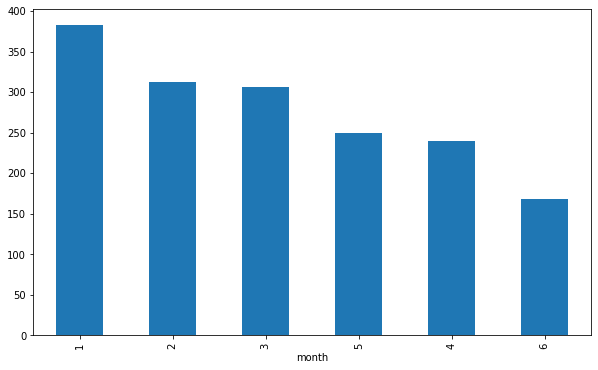

In [ ]:
#Γράφημα με τον αριθμό των δημοσιευμένων άρθρων για τα εμβόλια, ανά μήνα στο Skai
skai_df['2021-01': ].value_counts('month').plot(kind= 'bar', figsize= (10,6))

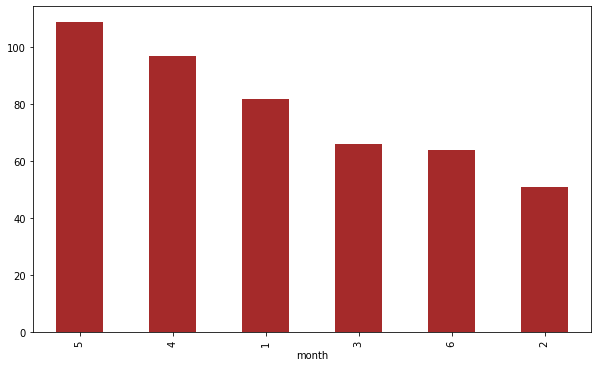

In [ ]:
#Γράφημα με τον αριθμό των δημοσιευμένων άρθρων για τα εμβόλια, ανά μήνα στο Star
star_df['2021-01': ].value_counts('month').plot(kind= 'bar', figsize= (10,6), color= 'brown')

In [ ]:
#Ο μέσος όρος των δημοσιευμένων άρθρων για τα εμβόλια, ανά μήνα στο Skai
skai_df['month'].value_counts().sort_values(ascending= False).mean()

276.5

In [ ]:
#Ο μέσος όρος των δημοσιευμένων άρθρων για τα εμβόλια, ανά μήνα στο Star
star_df['month'].value_counts().sort_values(ascending= False).mean()

78.16666666666667

## Φτιάχνουμε το WordCloud από τα κείμενα των τίτλων και των περιγραφών

In [ ]:
#Δημιουργούμε νέα στήλη με το κείμενο του τίτλου και της περιγραφής, των άρθρων
skai_df["text"] = skai_df["title"] + skai_df["summary"]

In [ ]:
#Δημιουργούμε νέα στήλη με το κείμενο του τίτλου και της περιγραφής, των άρθρων
star_df["text"] = star_df["title"] + star_df["summary"]

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
#Καθαρίζουμε το κείμενο από περιττούς χαρακτήρες
skaitext = skai_df['text'].replace("amp", ' ').str.replace('AMP',' ').str.replace('Amp',' ').str.replace('links',' ').str.replace("RT", " ").str.replace('@',' ').str.replace('http',' ').str.replace('https',' ').str.replace('rt',' ').str.cat(sep = ' ')

In [ ]:
#Καθαρίζουμε το κείμενο από περιττούς χαρακτήρες
startext = star_df['text'].replace("amp", ' ').str.replace('AMP',' ').str.replace('Amp',' ').str.replace('links',' ').str.replace("RT", " ").str.replace('@',' ').str.replace('http',' ').str.replace('https',' ').str.replace('rt',' ').str.cat(sep = ' ')

In [ ]:
skaitext

'Moderna: Τουλάχιστον έξι μήνες προστασία μετά τη 2η δόση του εμβολίου | ΣΚΑΪΤο εμβόλιο της Moderna έχει λάβει άδεια ή έχει εγκριθεί για χρήση σε περισσότερες από 40 χώρες και χρησιμοποιεί την τεχνολογία messenger RNA (mRNA). Η Pfizer θα παράγει συστατικό για το εμβόλιο κατά της Covid-19 στην Ιρλανδία | ΣΚΑΪΟ Ιρλανδός πρωθυπουργός Μίχολ Μάρτιν χαιρέτισε την εξέλιξη αυτή με ανάρτησή του στο Twitter και έκανε λόγο για μια «εξαιρετική είδηση που… βάζει την Ιρλανδία στην καρδιά της μάχης της ΕΕ εναντίον της πανδημίας». Ο Άντονι Φάουτσι στον ΣΚΑΪ: Τι είπε για τα εμβόλια, τις παρενέργειες και την Ελλάδα | ΣΚΑΪΟ Eπιδημιολόγος-σύμβουλος προέδρου Μπάιντεν,\xa0αναφέρθηκε στην\xa0\xa0ασφάλεια των εμβολίων αλλά και για τη συζήτηση γύρω από τα εμβόλια της Ρωσίας και της Κίνας Γώγος σε ΣΚΑΪ: Αυστηρότερα μέτρα αν χρειαστεί - Δεν υπάρχει δεδομένο για 3η δόση | ΣΚΑΪΌπως ανέφερε το μέλος της επιτροπής, υπάρχουν δεδομένα για το νοτιοαφρικανικό στέλεχος ότι τα αντισώματα σε άρρωστους που προϋπήρχαν από πρ

In [ ]:
startext

"Θεοδωρίδου: Έρχεται Το Εμβόλιο Της Johnson & Johnson | Star.gr «Σύντομα θα έχουμε το εμβόλιο της Johnson & Johnson» AstraZeneca: Αποτελεσματικό Κατά Σχεδόν 100% Το Εμβόλιο | Star.gr Αποτρέπει μια σοβαρή εξέλιξη της νόσου Μαρία Ναυπλιώτου: Θα Κάνει Ή Όχι Το Εμβόλιο Του Κορωνοϊού; | Star.gr Η ηθοποιός ήταν καλεσμένη στο TRACTION με τον Κώστα Στεφανή Παπαδάκης: Θα Κάνω Το Εμβόλιο | Star.gr Τι είπε στην εκπομπή της Φαίης Σκορδά Βερολίνο: Κοντά Σε Συμφωνία με τη Ρωσία Για το Εμβόλιο | Star.gr Όσα δήλωσε ο Υπουργός Υγείας της Γερμανίας, Γενς Σπαν ΕΜΑ: Αξιολόγηση Του Εμβολίου Της Novavax | Star.gr Πώς λειτουργεί το «NVX-CoV2373» Covid: Δε Σχετίζονται Οι Θάνατοι Στη Νορβηγία Με Το Εμβόλιο | Star.gr «Το εμβόλιο δεν προκαλεί νόσο» Έλενα Ασημακοπούλου: Έκανε Το Εμβόλιο Για Τον Κορωνοϊό | Star.gr Η τρυφερή ανάρτηση στο Instagram AstraZeneca & Σύνδρομο Guillain-Barré - Τι Εξετάζει ο ΕΜΑ | Star.gr Στο μικροσκόπιο και παρενέργειες από τα εμβόλια mRNA Pfizer: Αποτελεσματικό Το Εμβόλιο Στην Παραλλαγή 

In [ ]:
#Εισάγουμε την απαραίτητη βιβλιοθήκη και το ελληνικό λεξικό
import spacy

In [ ]:
#!python -m spacy download el_core_news_sm

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
list(nlp.Defaults.stop_words)[0:20]

['κτλ',
 'κάποια',
 'εκείνης',
 'όποια',
 'εν',
 'κάτι',
 'αφού',
 'μερικοί',
 'τούτων',
 'ίδιους',
 'ορισμένα',
 'μερικές',
 'ακόμη',
 'μερικών',
 'προ',
 'τουλάχιστο',
 'ορισμένων',
 'εντός',
 'μπορούν',
 'παντού']

In [ ]:
full_doc1 = nlp(skaitext)

In [ ]:
full_doc2 = nlp(startext)

In [ ]:
clear_text1 = ' '.join(token.lemma_ for token in full_doc1)

In [ ]:
clear_text2 = ' '.join(token.lemma_ for token in full_doc2)

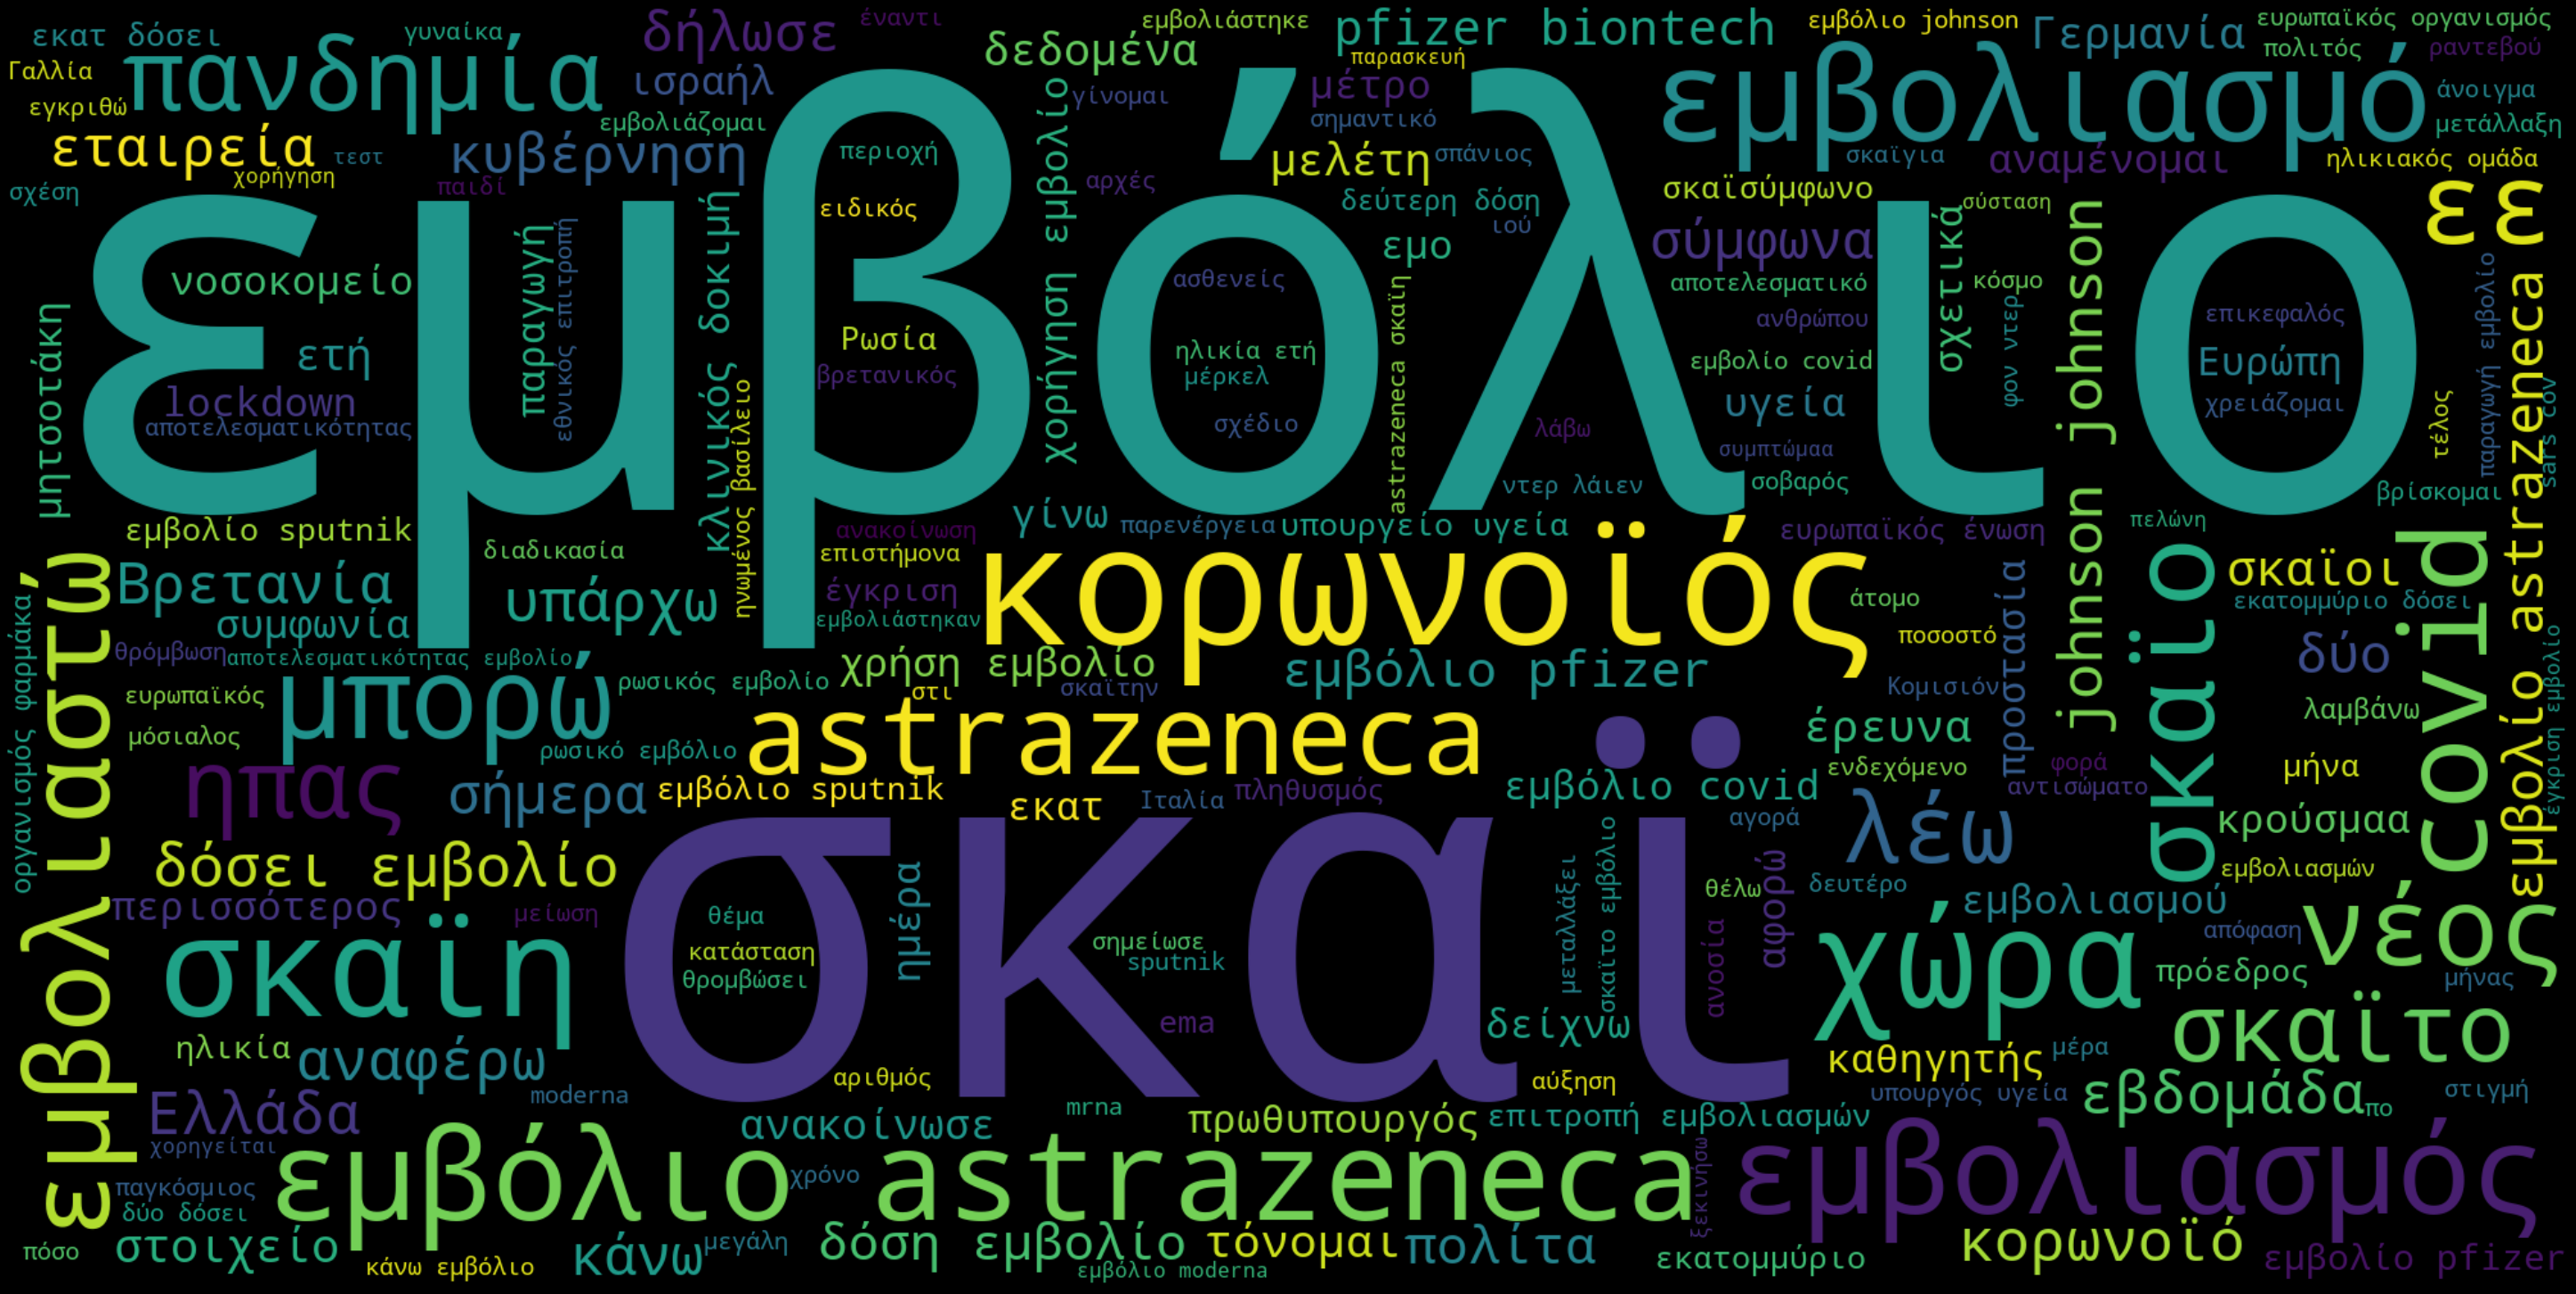

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text1)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

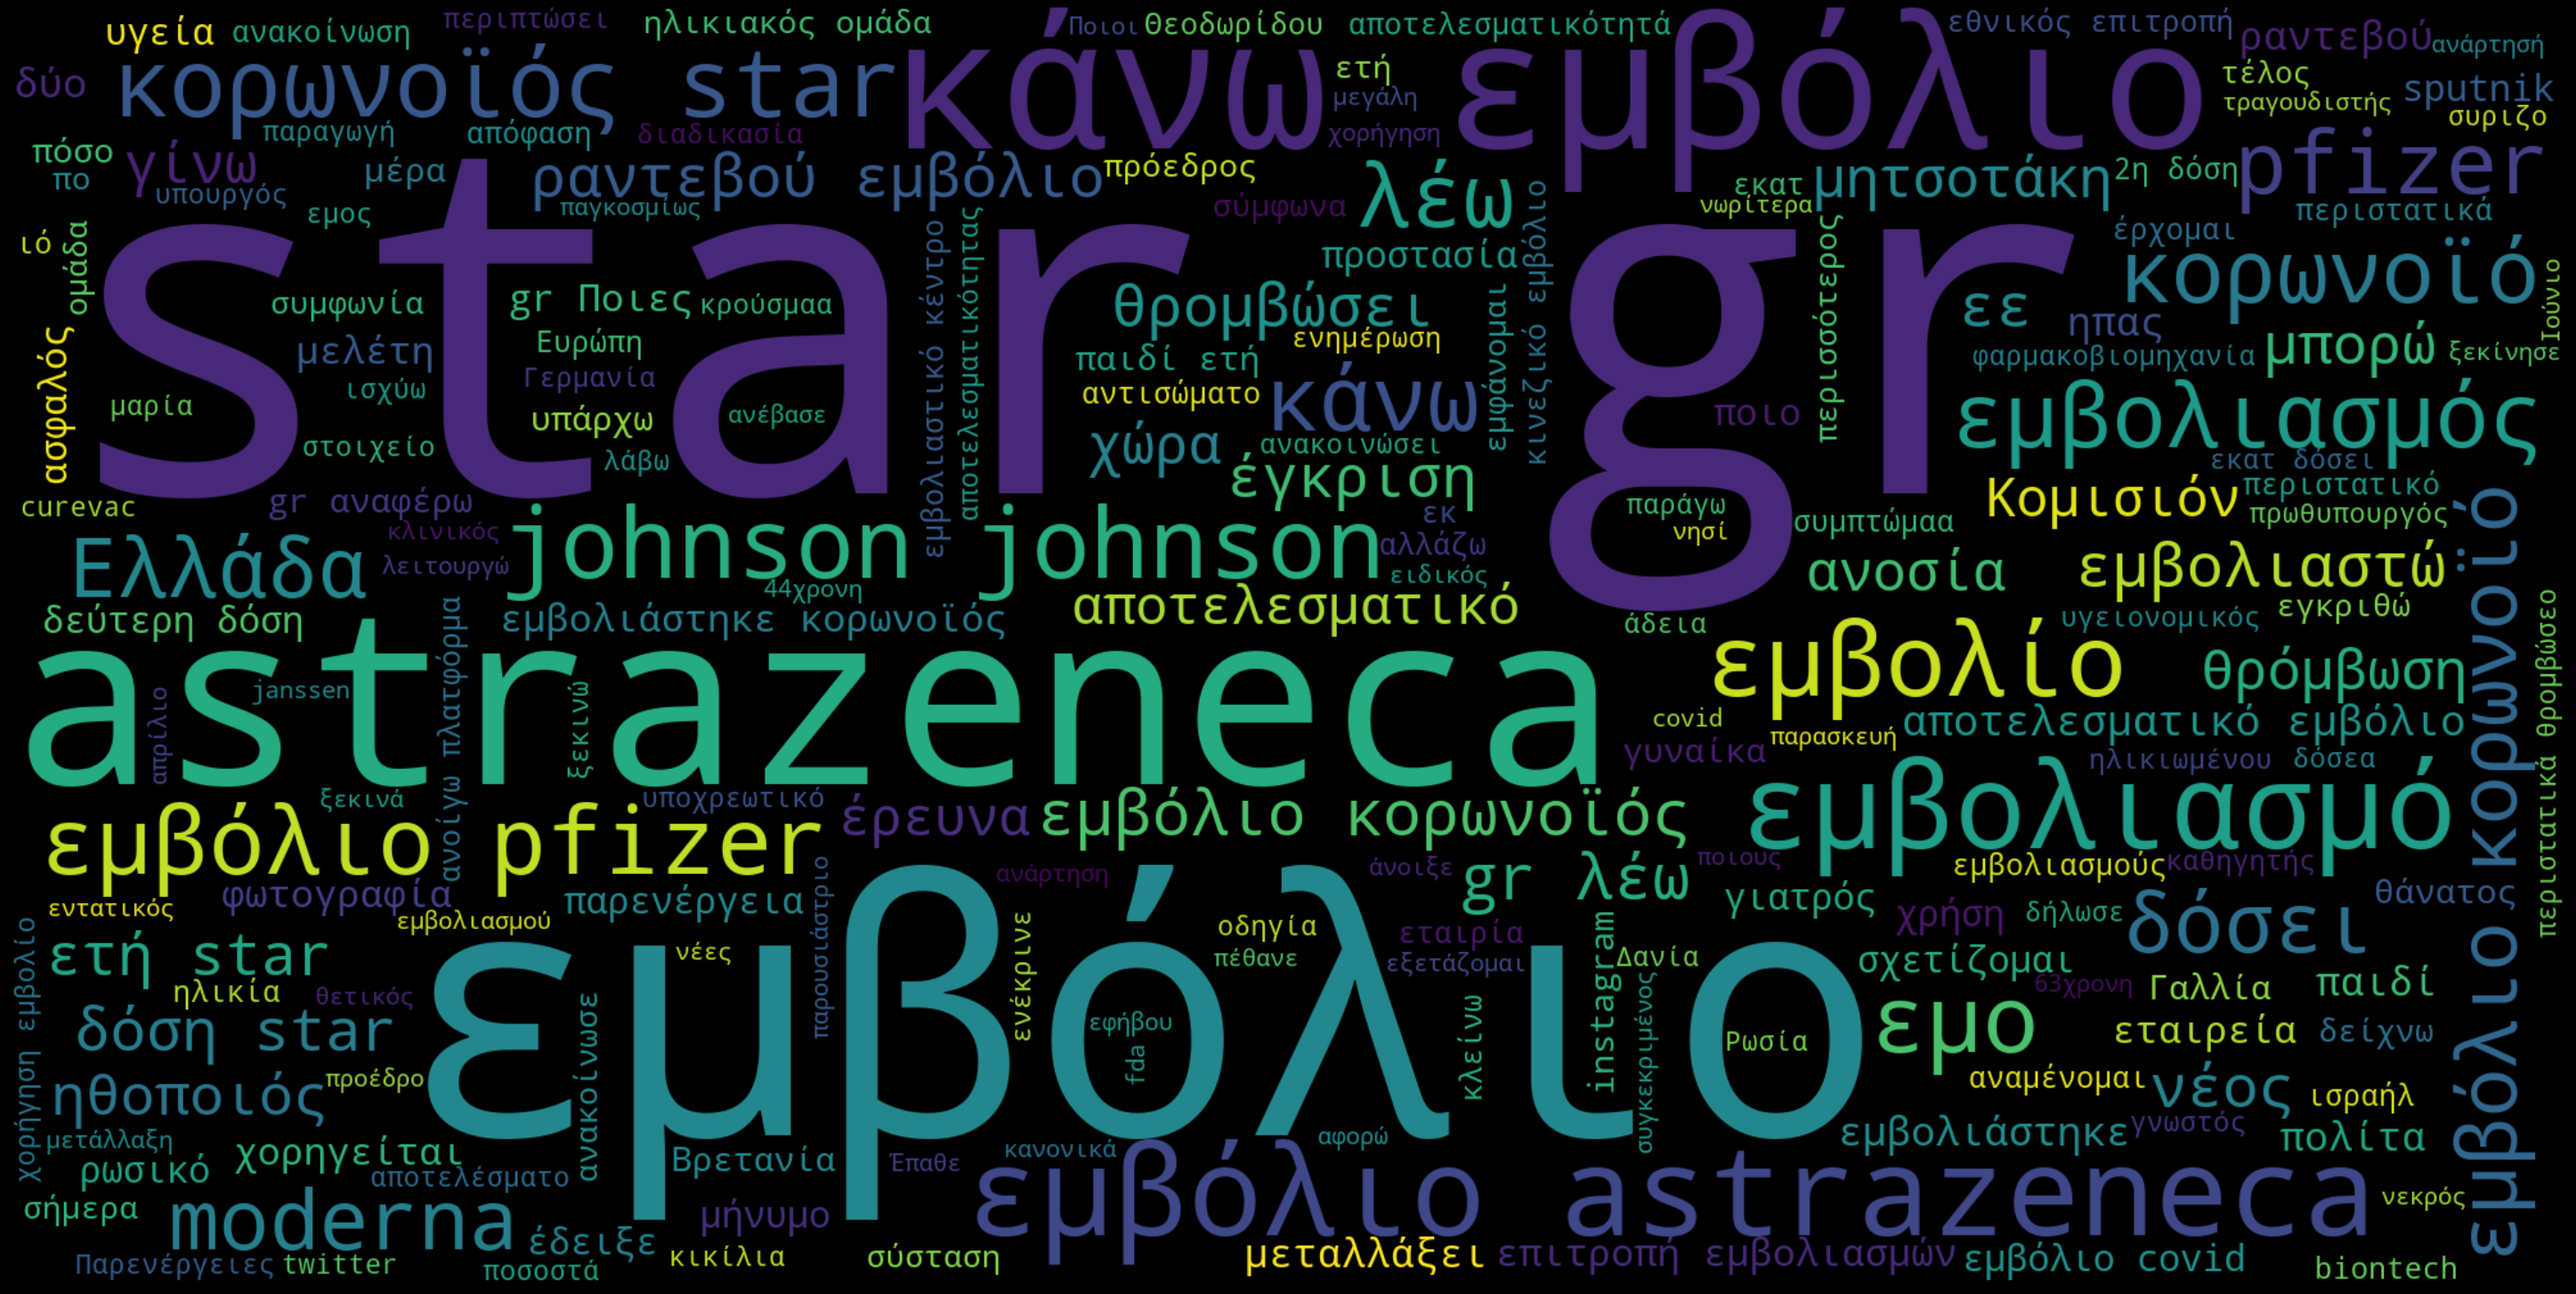

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text2)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()